In [203]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neural_network import MLPRegressor
import pandas as pd
import seaborn as sns
from sklearn.metrics import root_mean_squared_error

In [26]:
mu = 0
sigma = 1
x = np.linspace(-4, 4, 100)
y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1*(x-mu)**2/2*sigma**2)
X = x.reshape(-1,1)
y.dtype

dtype('float64')

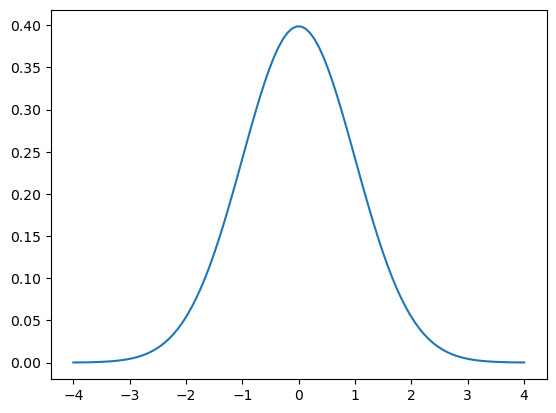

In [76]:
plt.plot(X,y)

In [263]:
hidden_layer_size = (2,)
hidden_layer_activation = 'relu'
num_epochs = 75

/home/jo/micromamba/envs/mlhydro/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0.5, 1.0, 'Model after 1 epoch')

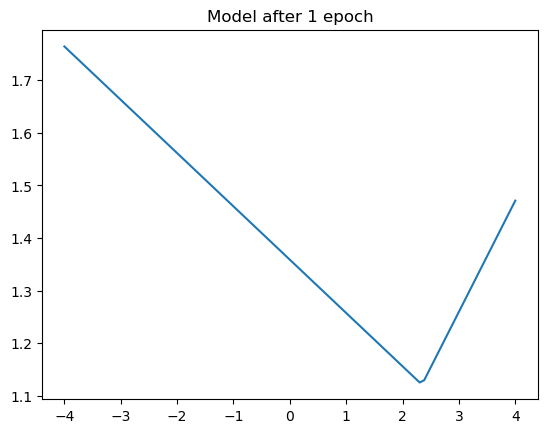

In [264]:
test_ann = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=hidden_layer_size,
                  activation=hidden_layer_activation, max_iter=1,
                  )
test_ann.fit(X,y)
plt.plot(X, test_ann.predict(X))
plt.title("Model after 1 epoch")

In [265]:
ann = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=hidden_layer_size,
                  activation=hidden_layer_activation, max_iter=1,
                  warm_start=True)

In [266]:
param_values = []
param_types = []
param_epochs = []
param_node = [] 
param_layer = []
results = []
results_epochs = []
Xs = []

In [267]:
for epoch in range(num_epochs):
    ann.fit(X, y)
    for i, weights in enumerate(ann.coefs_):
        for j, weight in enumerate(weights[0]):
            param_values.append(weight)
            param_types.append("weight")
            param_layer.append(i)
            param_node.append(j)
            param_epochs.append(epoch)
    for i, biases in enumerate(ann.intercepts_):
        for j, bias in enumerate(biases):
            param_values.append(bias)
            param_types.append("bias")
            param_layer.append(i)
            param_node.append(j)
            param_epochs.append(epoch)
    y_pred = ann.predict(X)
    Xs += list(X.flatten())
    results += list(y_pred)
    results_epochs += [epoch]*len(y_pred)

/home/jo/micromamba/envs/mlhydro/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jo/micromamba/envs/mlhydro/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jo/micromamba/envs/mlhydro/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lb

In [268]:
param_df = pd.DataFrame({'value': param_values,
                         'type': param_types,
                         'layer': param_layer,
                         'node': param_node,
                         'epoch': param_epochs})
results_df = pd.DataFrame({'X': Xs,
                           'Y': results,
                           'epoch': results_epochs})

Text(0.5, 1.0, 'Evolution of Prediction')

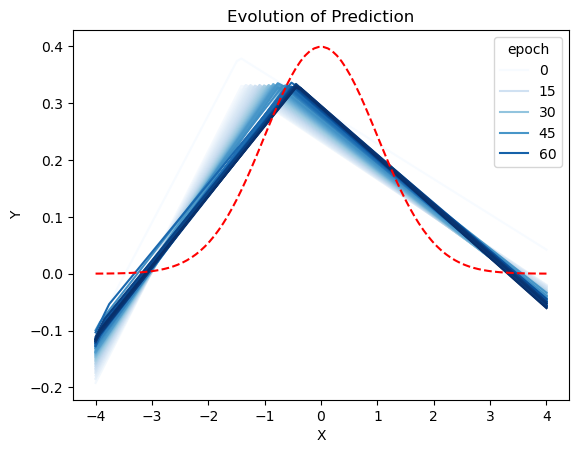

In [269]:
fig, ax = plt.subplots()
sns.lineplot(data=results_df, x='X', y='Y', hue='epoch', ax=ax, palette=sns.color_palette("Blues", as_cmap=True))
ax.plot(X, y, c='r', linestyle='--')
ax.set_title("Evolution of Prediction")

In [270]:
loss_epochs = []
loss = []
for epoch in range(num_epochs):
    result = results[epoch*len(y):(epoch+1)*len(y)]
    loss.append(root_mean_squared_error(y, result))
    

Text(0.5, 1.0, 'Loss Over Epochs')

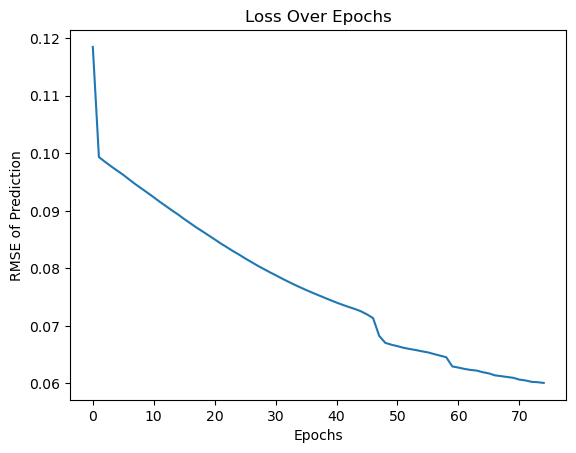

In [271]:
plt.plot(range(num_epochs), loss)
plt.xlabel("Epochs")
plt.ylabel("RMSE of Prediction")
plt.title("Loss Over Epochs")

In [272]:
hidden_weights = param_df[(param_df['type']=='weight')  & (param_df['layer']==0)]
hidden_bias = param_df[(param_df['type']=='bias')  & (param_df['layer']==0)]
output_weights = param_df[(param_df['type']=='weight')  & (param_df['layer']==1)]
output_bias = param_df[(param_df['type']=='bias')  & (param_df['layer']==1)]

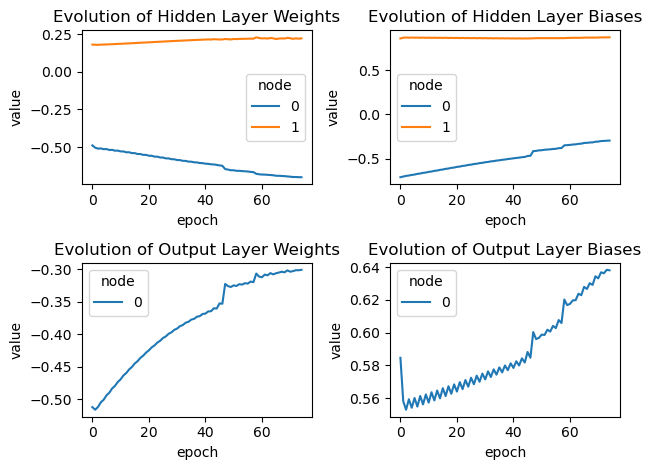

In [273]:
fig, axs = plt.subplots(2,2)
sns.lineplot(data=hidden_weights, x='epoch', y='value', hue='node', ax=axs[0][0])
sns.lineplot(data=hidden_bias, x='epoch', y='value', hue='node', ax=axs[0][1])
sns.lineplot(data=output_weights, x='epoch', y='value', hue='node', ax=axs[1][0])
sns.lineplot(data=output_bias, x='epoch', y='value', hue='node', ax=axs[1][1])
axs[0][0].set_title("Evolution of Hidden Layer Weights")
axs[0][1].set_title("Evolution of Hidden Layer Biases")
axs[1][0].set_title("Evolution of Output Layer Weights")
axs[1][1].set_title("Evolution of Output Layer Biases")
fig.tight_layout()